# Decision Tree - Penguins Classifier

## 1. Import Modules and Data

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

For this notebook we will use the <a href="https://https://archive.ics.uci.edu/dataset/690/palmer+penguins-3" >Palmer Penguins from ALLISON HORST github Repository</a>, where we will classifier three penguin species: Adelie, Chinstrap, and Gentoo, with features such as bill length, flipper length, body mass, and sex. 

In [259]:
pd.set_option('display.max_columns', None)  # Hiện tất cả cột


In [260]:
df = pd.read_csv("bank.csv")

In [261]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [262]:
df.tail()

age          job  marital  education default  balance housing loan  \
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no

## 2. Preprocessing

After loading the data, the first step is always to get an idea of what the data looks like and how it's structured. That should give us an idea on how to clean it, as well as what models to use. 

## Data exploration

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


1. info tells us that there are no null values in dataset
2. only 7 features are numerical
3. 10 fetaures are categorical

## Encode data

In [264]:
df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})
df['deposit'].head()

/tmp/ipykernel_124354/4170051603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['deposit'] = df['deposit'].replace({'yes': 1, 'no': 0})


0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [265]:
df['loan'] = df['loan'].replace({'yes': 1, 'no': 0})
df.head()

/tmp/ipykernel_124354/1915311639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan'] = df['loan'].replace({'yes': 1, 'no': 0})


age         job  marital  education default  balance housing  loan  \
0   59      admin.  married  secondary      no     2343     yes     0   
1   56      admin.  married  secondary      no       45      no     0   
2   41  technician  married  secondary      no     1270     yes     0   
3   55    services  married  secondary      no     2476     yes     0   
4   54      admin.  married   tertiary      no      184      no     0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [266]:
df['default'] = df['default'].replace({'yes': 1, 'no': 0})
df.head()

/tmp/ipykernel_124354/1375337725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['default'] = df['default'].replace({'yes': 1, 'no': 0})


age         job  marital  education  default  balance housing  loan  \
0   59      admin.  married  secondary        0     2343     yes     0   
1   56      admin.  married  secondary        0       45      no     0   
2   41  technician  married  secondary        0     1270     yes     0   
3   55    services  married  secondary        0     2476     yes     0   
4   54      admin.  married   tertiary        0      184      no     0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [267]:
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})
df.head()

/tmp/ipykernel_124354/2880570166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})


age         job  marital  education  default  balance  housing  loan  \
0   59      admin.  married  secondary        0     2343        1     0   
1   56      admin.  married  secondary        0       45        0     0   
2   41  technician  married  secondary        0     1270        1     0   
3   55    services  married  secondary        0     2476        1     0   
4   54      admin.  married   tertiary        0      184        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [268]:
one_hot = pd.get_dummies(df['marital'], prefix='marital')
df = df.drop('marital',axis = 1)
df = df.join(one_hot)

In [269]:
df.head()


age         job  education  default  balance  housing  loan  contact  day  \
0   59      admin.  secondary        0     2343        1     0  unknown    5   
1   56      admin.  secondary        0       45        0     0  unknown    5   
2   41  technician  secondary        0     1270        1     0  unknown    5   
3   55    services  secondary        0     2476        1     0  unknown    5   
4   54      admin.   tertiary        0      184        0     0  unknown    5   

  month  duration  campaign  pdays  previous poutcome  deposit  \
0   may      1042         1     -1         0  unknown        1   
1   may      1467         1     -1         0  unknown        1   
2   may      1389         1     -1         0  unknown        1   
3   may       579         1     -1         0  unknown        1   
4   may       673         2     -1         0  unknown        1   

   marital_divorced  marital_married  marital_single  
0             False             True           False  
1             False             True           False  
2             False             True           False  
3             False             True           False  
4             False             True           False

In [270]:
one_hot = pd.get_dummies(df['education'], prefix='education')
df = df.drop('education',axis = 1)
df = df.join(one_hot)
df.head()

age         job  default  balance  housing  loan  contact  day month  \
0   59      admin.        0     2343        1     0  unknown    5   may   
1   56      admin.        0       45        0     0  unknown    5   may   
2   41  technician        0     1270        1     0  unknown    5   may   
3   55    services        0     2476        1     0  unknown    5   may   
4   54      admin.        0      184        0     0  unknown    5   may   

   duration  campaign  pdays  previous poutcome  deposit  marital_divorced  \
0      1042         1     -1         0  unknown        1             False   
1      1467         1     -1         0  unknown        1             False   
2      1389         1     -1         0  unknown        1             False   
3       579         1     -1         0  unknown        1             False   
4       673         2     -1         0  unknown        1             False   

   marital_married  marital_single  education_primary  education_secondary  \
0             True           False              False                 True   
1             True           False              False                 True   
2             True           False              False                 True   
3             True           False              False                 True   
4             True           False              False                False   

   education_tertiary  education_unknown  
0               False              False  
1               False              False  
2               False              False  
3               False              False  
4                True              False

In [271]:
one_hot = pd.get_dummies(df['job'], prefix='job')
df = df.drop('job',axis = 1)
df = df.join(one_hot)
df.head()

age  default  balance  housing  loan  contact  day month  duration  \
0   59        0     2343        1     0  unknown    5   may      1042   
1   56        0       45        0     0  unknown    5   may      1467   
2   41        0     1270        1     0  unknown    5   may      1389   
3   55        0     2476        1     0  unknown    5   may       579   
4   54        0      184        0     0  unknown    5   may       673   

   campaign  pdays  previous poutcome  deposit  marital_divorced  \
0         1     -1         0  unknown        1             False   
1         1     -1         0  unknown        1             False   
2         1     -1         0  unknown        1             False   
3         1     -1         0  unknown        1             False   
4         2     -1         0  unknown        1             False   

   marital_married  marital_single  education_primary  education_secondary  \
0             True           False              False                 True   
1             True           False              False                 True   
2             True           False              False                 True   
3             True           False              False                 True   
4             True           False              False                False   

   education_tertiary  education_unknown  job_admin.  job_blue-collar  \
0               False              False        True            False   
1               False              False        True            False   
2               False              False       False            False   
3               False              False       False            False   
4                True              False        True            False   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0             False          False           False        False   
1             False          False           False        False   
2             False          False           False        False   
3             False          False           False        False   
4             False          False           False        False   

   job_self-employed  job_services  job_student  job_technician  \
0              False         False        False           False   
1              False         False        False           False   
2              False         False        False            True   
3              False          True        False           False   
4              False         False        False           False   

   job_unemployed  job_unknown  
0           False        False  
1           False        False  
2           False        False  
3           False        False  
4           False        False

In [272]:
one_hot = pd.get_dummies(df['contact'], prefix='contact')
df = df.drop('contact',axis = 1)
df = df.join(one_hot)
df.head()

age  default  balance  housing  loan  day month  duration  campaign  pdays  \
0   59        0     2343        1     0    5   may      1042         1     -1   
1   56        0       45        0     0    5   may      1467         1     -1   
2   41        0     1270        1     0    5   may      1389         1     -1   
3   55        0     2476        1     0    5   may       579         1     -1   
4   54        0      184        0     0    5   may       673         2     -1   

   previous poutcome  deposit  marital_divorced  marital_married  \
0         0  unknown        1             False             True   
1         0  unknown        1             False             True   
2         0  unknown        1             False             True   
3         0  unknown        1             False             True   
4         0  unknown        1             False             True   

   marital_single  education_primary  education_secondary  education_tertiary  \
0           False              False                 True               False   
1           False              False                 True               False   
2           False              False                 True               False   
3           False              False                 True               False   
4           False              False                False                True   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0              False        True            False             False   
1              False        True            False             False   
2              False       False            False             False   
3              False       False            False             False   
4              False        True            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False           False        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False           False           False        False   
2         False        False            True           False        False   
3          True        False           False           False        False   
4         False        False           False           False        False   

   contact_cellular  contact_telephone  contact_unknown  
0             False              False             True  
1             False              False             True  
2             False              False             True  
3             False              False             True  
4             False              False             True

In [273]:
one_hot = pd.get_dummies(df['month'], prefix='month')
df = df.drop('month',axis = 1)
df = df.join(one_hot)
df.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous poutcome  deposit  marital_divorced  marital_married  \
0         0  unknown        1             False             True   
1         0  unknown        1             False             True   
2         0  unknown        1             False             True   
3         0  unknown        1             False             True   
4         0  unknown        1             False             True   

   marital_single  education_primary  education_secondary  education_tertiary  \
0           False              False                 True               False   
1           False              False                 True               False   
2           False              False                 True               False   
3           False              False                 True               False   
4           False              False                False                True   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0              False        True            False             False   
1              False        True            False             False   
2              False       False            False             False   
3              False       False            False             False   
4              False        True            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False           False        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False           False           False        False   
2         False        False            True           False        False   
3          True        False           False           False        False   
4         False        False           False           False        False   

   contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  \
0             False              False             True      False      False   
1             False              False             True      False      False   
2             False              False             True      False      False   
3             False              False             True      False      False   
4             False              False             True      False      False   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_may  month_nov  month_oct  month_sep  
0       True      False      False      False  
1       True      False      False      False  
2       True      False      False      False  
3       True      False      False      False  
4       True      False      False      False

In [274]:
one_hot = pd.get_dummies(df['poutcome'], prefix='poutcome')
df = df.drop('poutcome',axis = 1)
df = df.join(one_hot)
df.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous  deposit  marital_divorced  marital_married  marital_single  \
0         0        1             False             True           False   
1         0        1             False             True           False   
2         0        1             False             True           False   
3         0        1             False             True           False   
4         0        1             False             True           False   

   education_primary  education_secondary  education_tertiary  \
0              False                 True               False   
1              False                 True               False   
2              False                 True               False   
3              False                 True               False   
4              False                False                True   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0              False        True            False             False   
1              False        True            False             False   
2              False       False            False             False   
3              False       False            False             False   
4              False        True            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False           False        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False           False           False        False   
2         False        False            True           False        False   
3          True        False           False           False        False   
4         False        False           False           False        False   

   contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  \
0             False              False             True      False      False   
1             False              False             True      False      False   
2             False              False             True      False      False   
3             False              False             True      False      False   
4             False              False             True      False      False   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0       True      False      False      False             False   
1       True      False      False      False             False   
2       True      False      False      False             False   
3       True      False      False      False             False   
4       True      False      False      False             False   

   poutcome_other  poutcome_success  poutcome_unknown  
0           False             False   

In [275]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  marital_divorced     11162 non-null  bool 
 12  marital_married      11162 non-null  bool 
 13  marital_single       11162 non-null  bool 
 14  education_primary    11162 non-null  bool 
 15  education_secondary  11162 non-null  bool 
 16  education_tertiary   1

## Split data into dependent and independent variables

In [276]:
X = df.drop('deposit', axis=1)
y = df['deposit']

print(f"Dataset shape: {X.shape}, Label distribution:\n{y.value_counts()}")

Dataset shape: (11162, 48), Label distribution:
deposit
0    5873
1    5289
Name: count, dtype: int64


In [277]:
df.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous  deposit  marital_divorced  marital_married  marital_single  \
0         0        1             False             True           False   
1         0        1             False             True           False   
2         0        1             False             True           False   
3         0        1             False             True           False   
4         0        1             False             True           False   

   education_primary  education_secondary  education_tertiary  \
0              False                 True               False   
1              False                 True               False   
2              False                 True               False   
3              False                 True               False   
4              False                False                True   

   education_unknown  job_admin.  job_blue-collar  job_entrepreneur  \
0              False        True            False             False   
1              False        True            False             False   
2              False       False            False             False   
3              False       False            False             False   
4              False        True            False             False   

   job_housemaid  job_management  job_retired  job_self-employed  \
0          False           False        False              False   
1          False           False        False              False   
2          False           False        False              False   
3          False           False        False              False   
4          False           False        False              False   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0         False        False           False           False        False   
1         False        False           False           False        False   
2         False        False            True           False        False   
3          True        False           False           False        False   
4         False        False           False           False        False   

   contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  \
0             False              False             True      False      False   
1             False              False             True      False      False   
2             False              False             True      False      False   
3             False              False             True      False      False   
4             False              False             True      False      False   

   month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
0      False      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0       True      False      False      False             False   
1       True      False      False      False             False   
2       True      False      False      False             False   
3       True      False      False      False             False   
4       True      False      False      False             False   

   poutcome_other  poutcome_success  poutcome_unknown  
0           False             False   

In [278]:
## 3. Prepare Train/Test Splits

In [279]:
subsets = []
split_ratios = [0.4, 0.6, 0.8, 0.9] 

In [280]:
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=ratio, stratify=y, shuffle=True, random_state=42
    )
    subsets.append((X_train, X_test, y_train, y_test))

## Visualize lable distribution

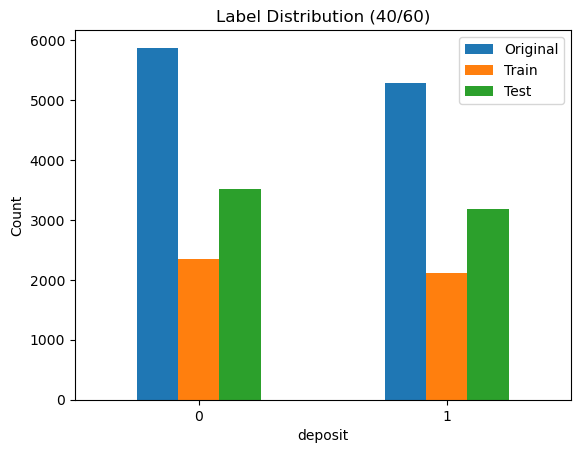

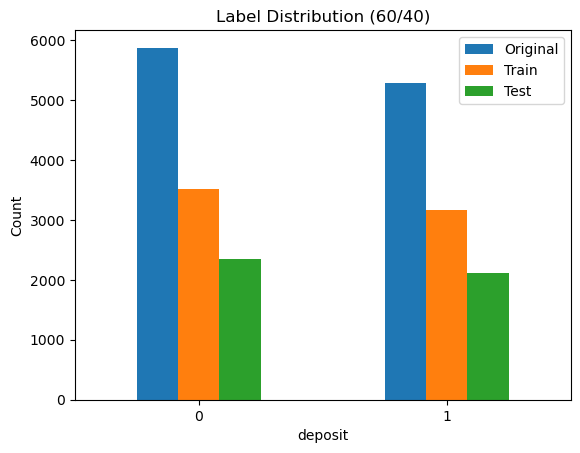

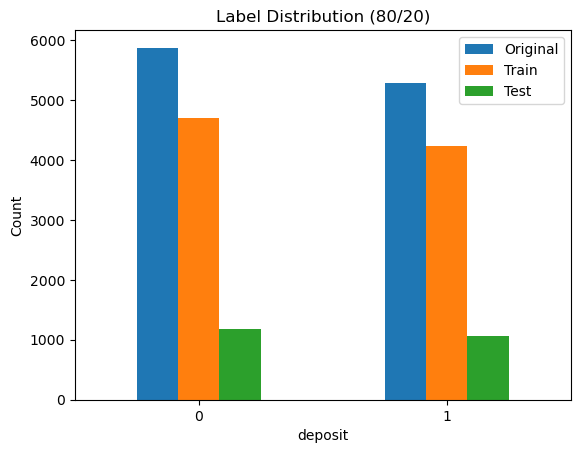

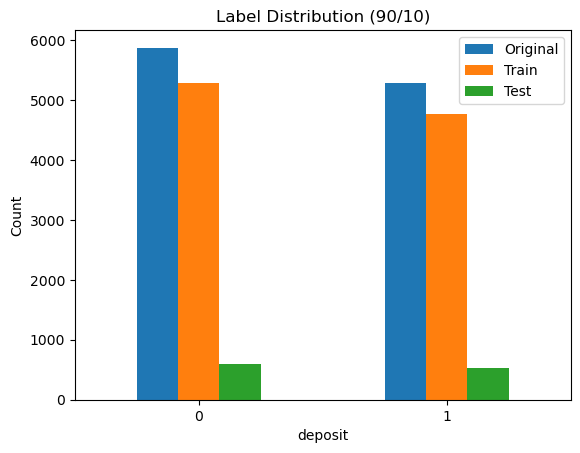

In [281]:
def plot_label_distribution(y_original, y_train, y_test, title):
    counts = pd.DataFrame({
        'Original': pd.Series(y_original).value_counts(),
        'Train': pd.Series(y_train).value_counts(),
        'Test': pd.Series(y_test).value_counts()
    })
    counts.plot(kind='bar', rot=0)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    title = f"Label Distribution ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})"
    plot_label_distribution(y, y_train, y_test, title)

## 4. Train Decision Trees

## Building the decision tree classifiers

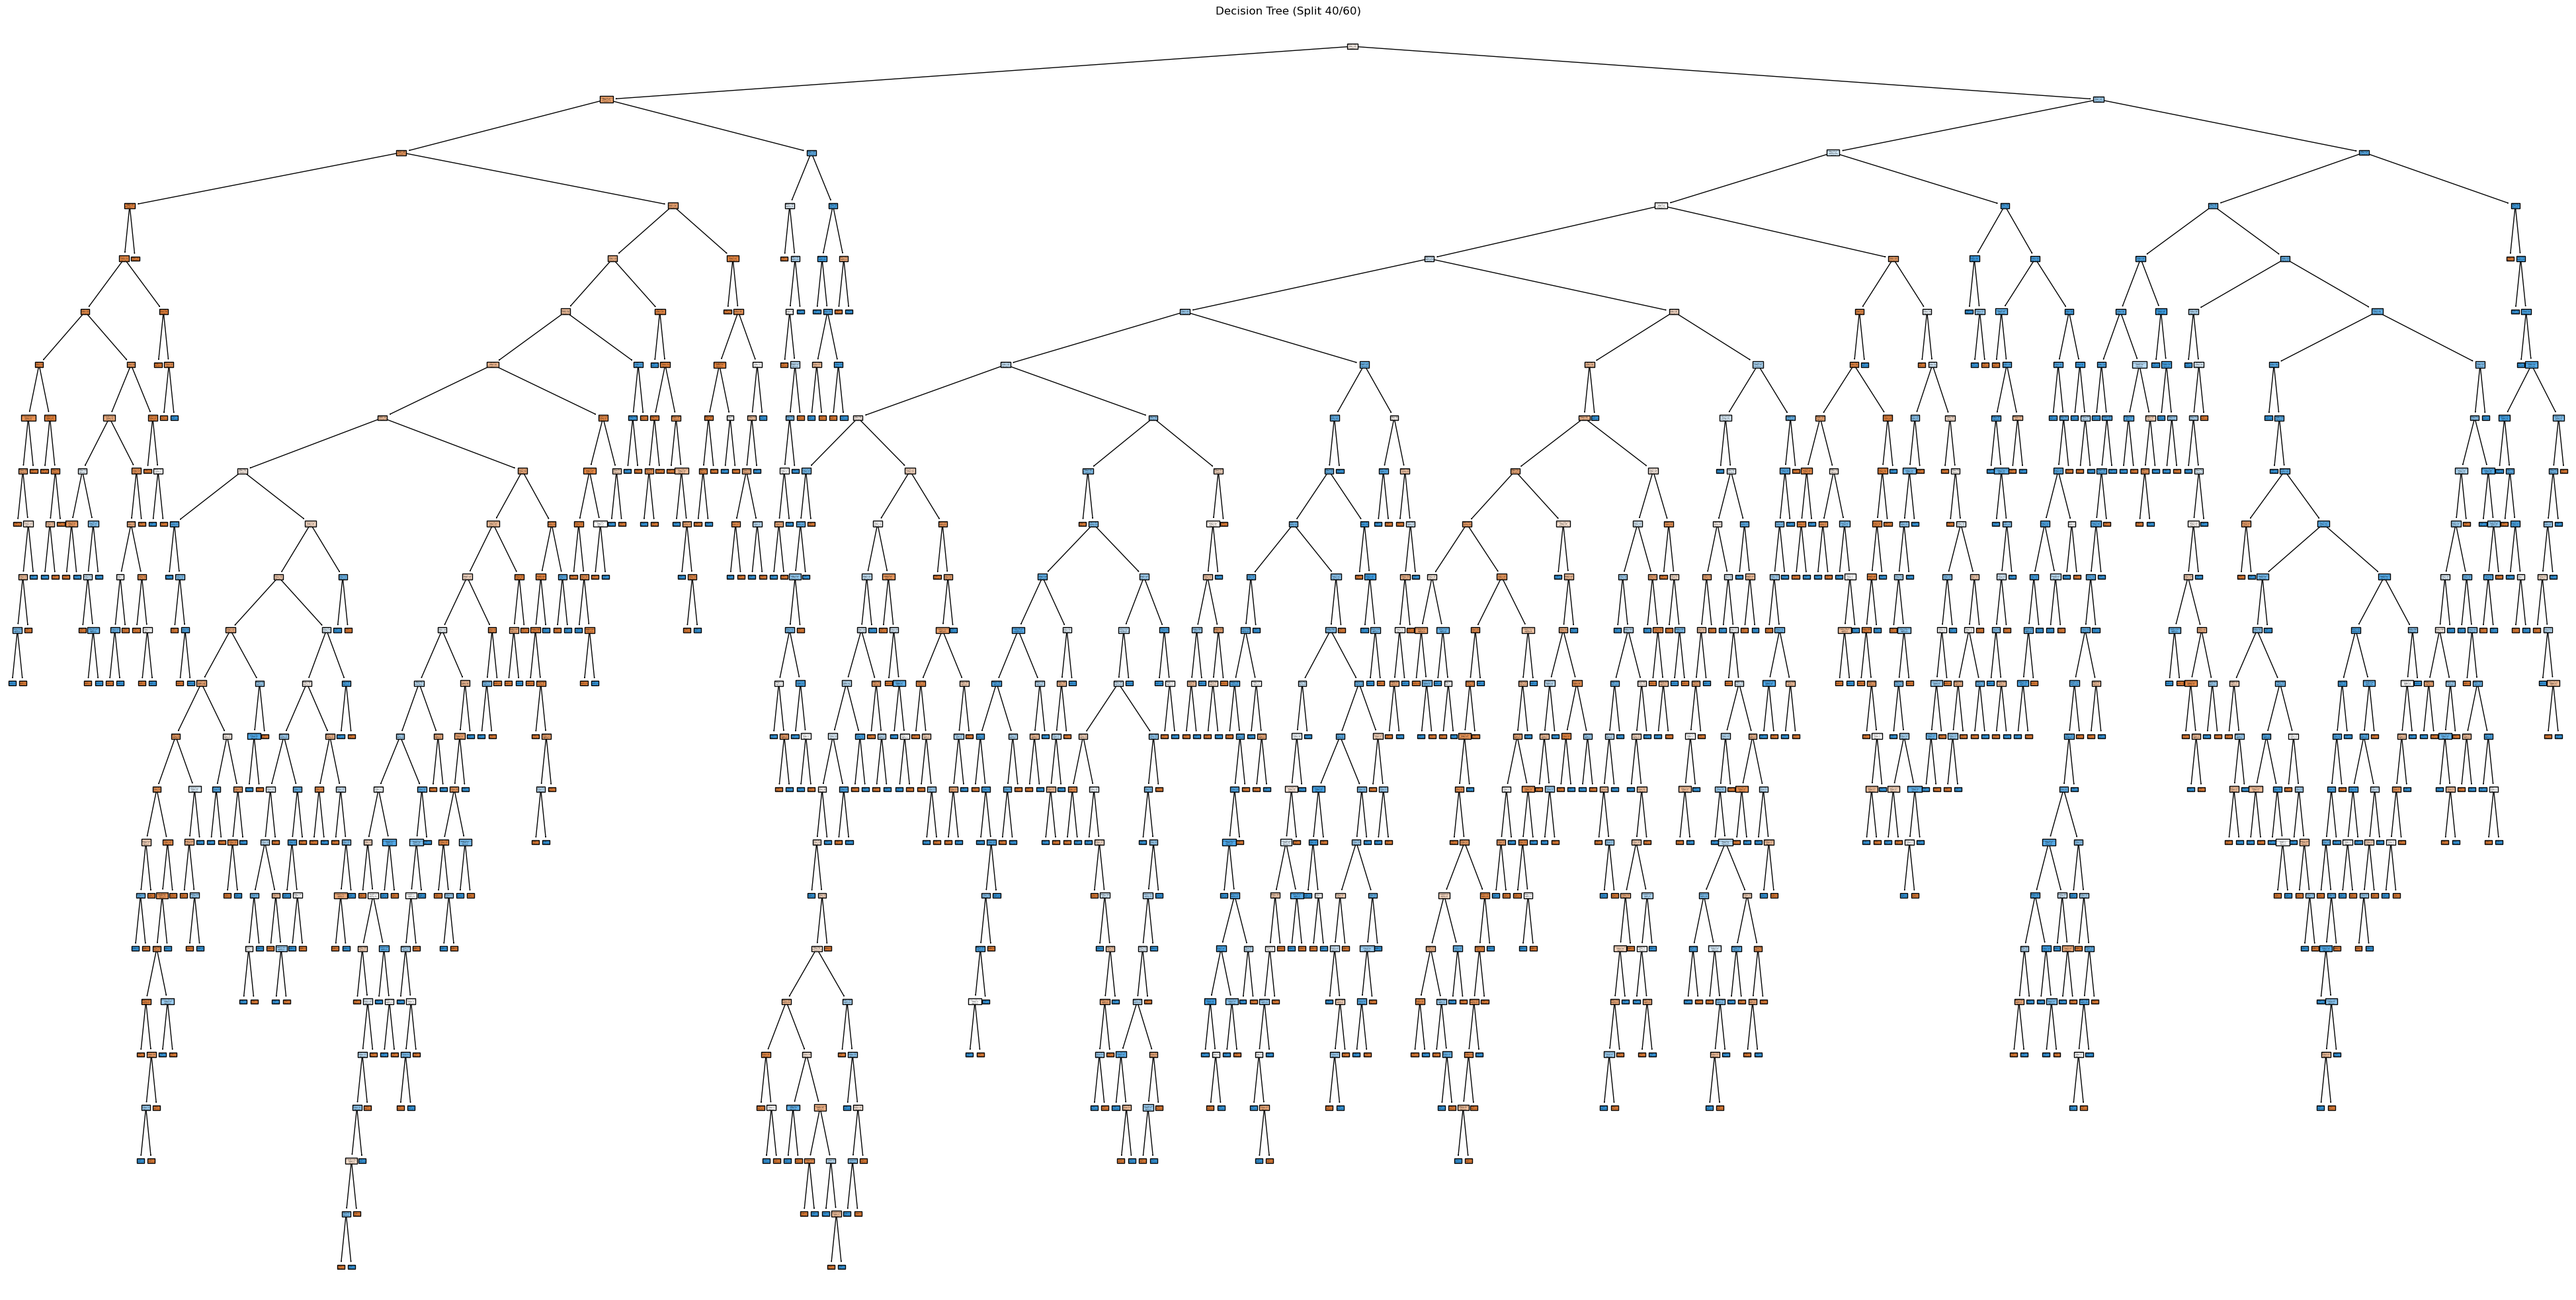

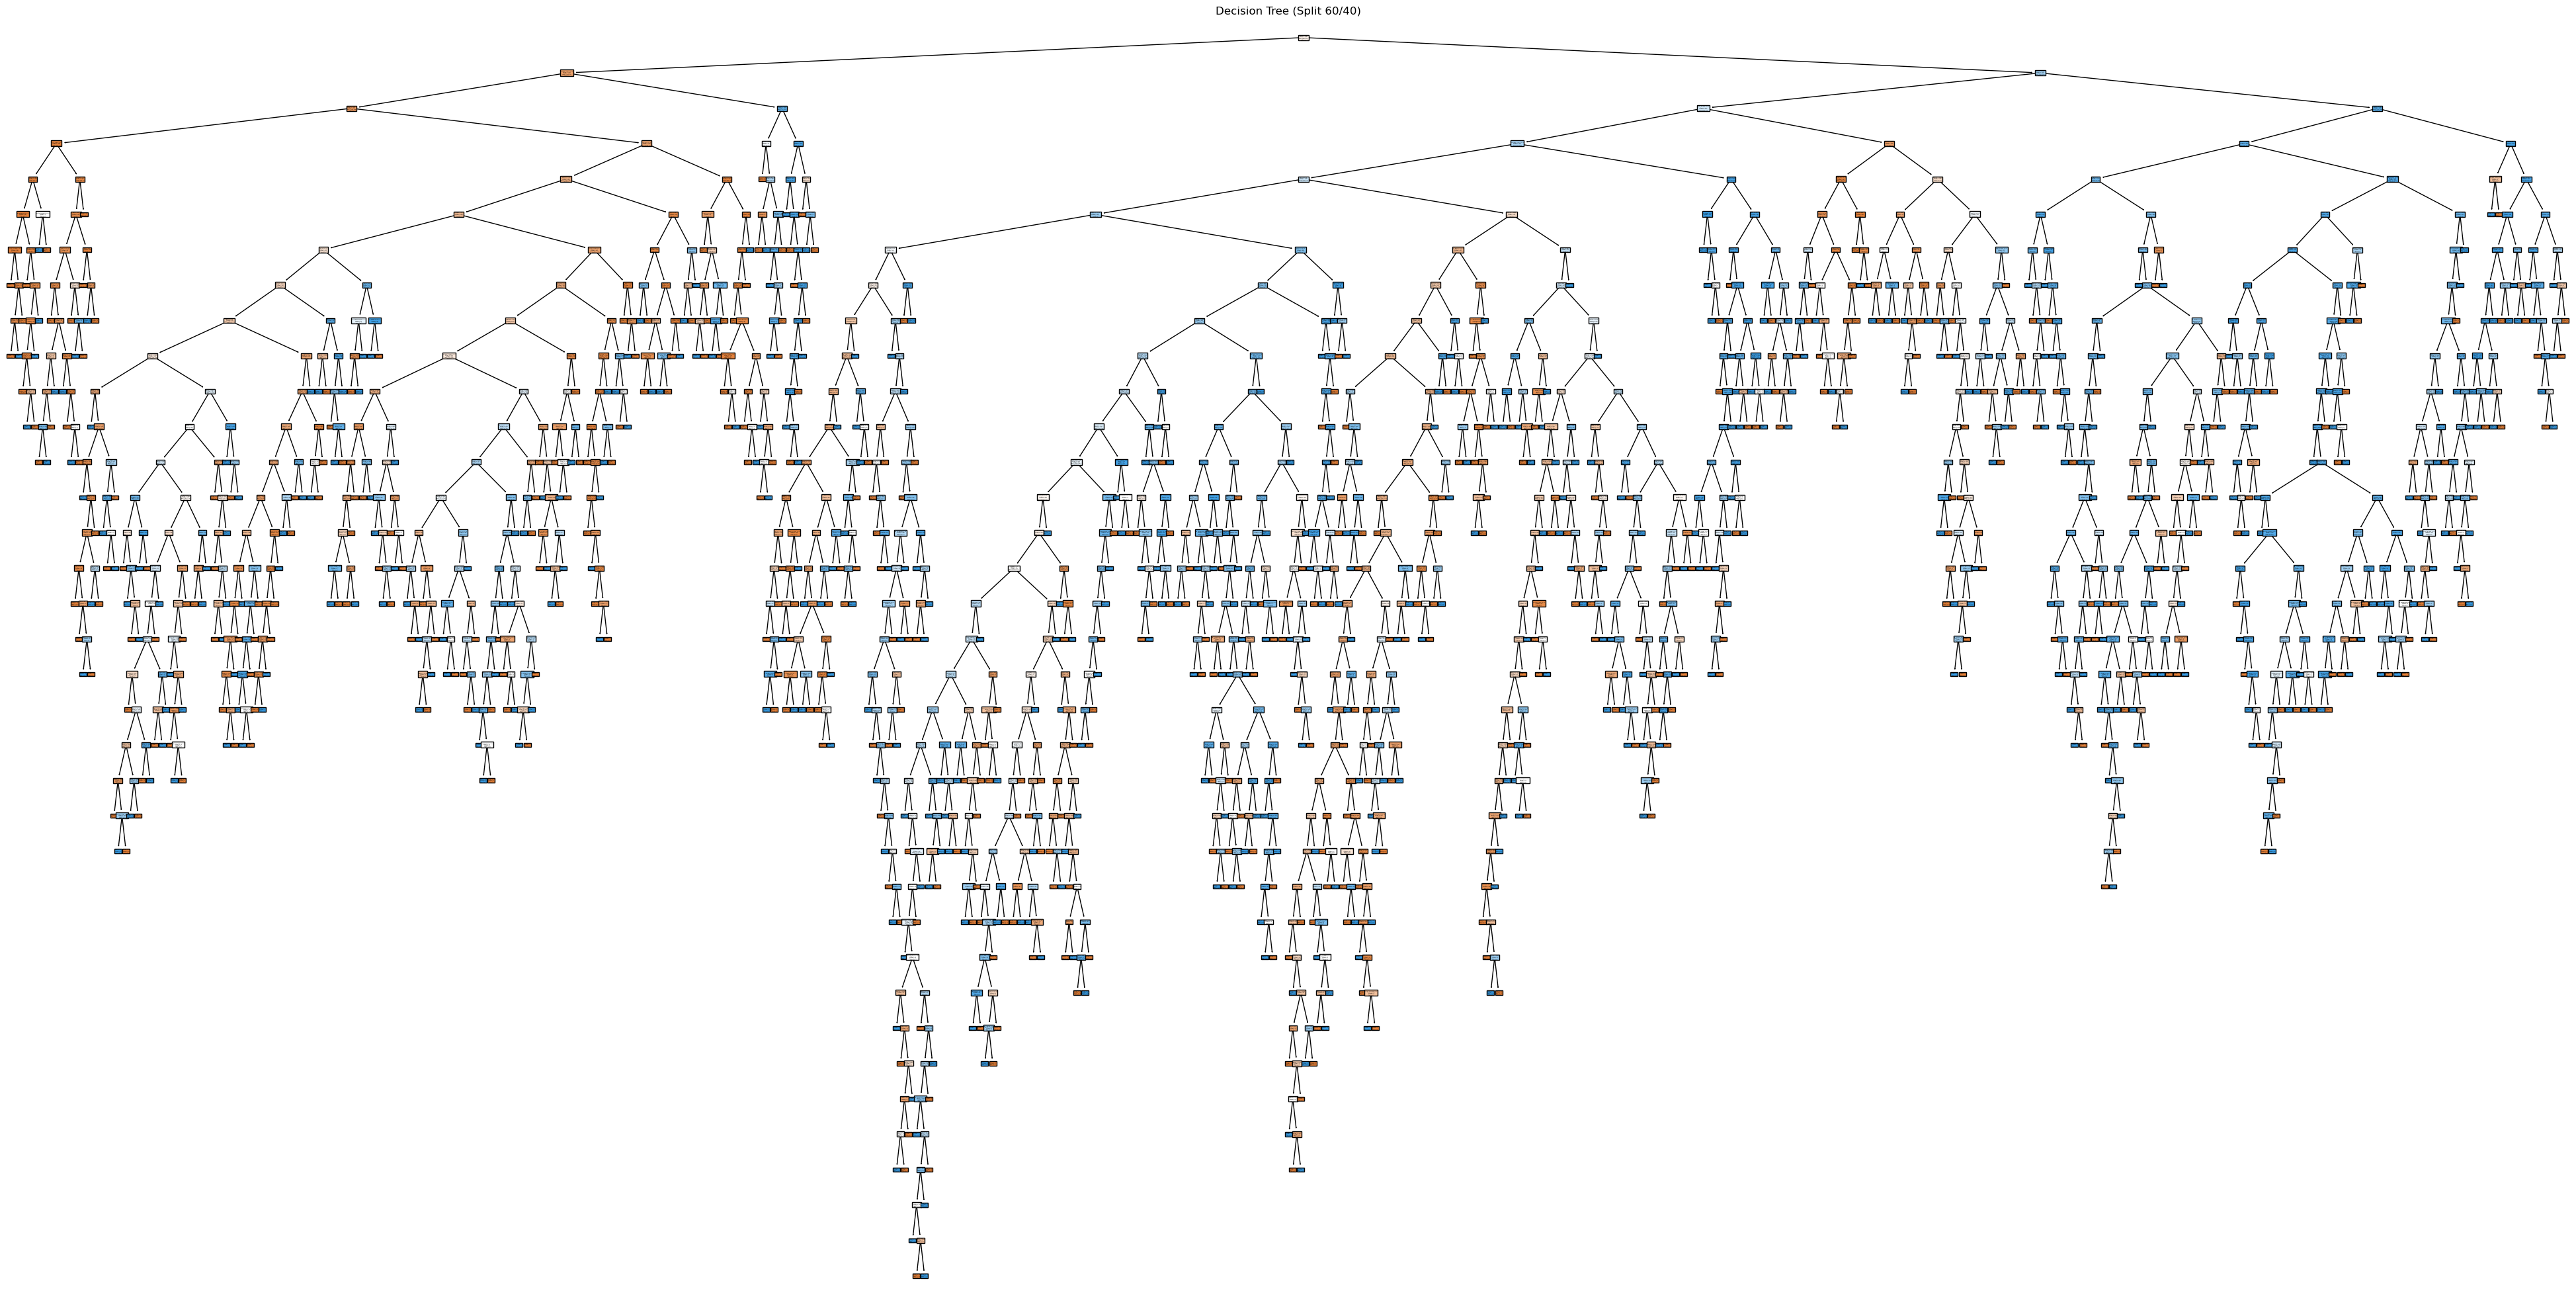

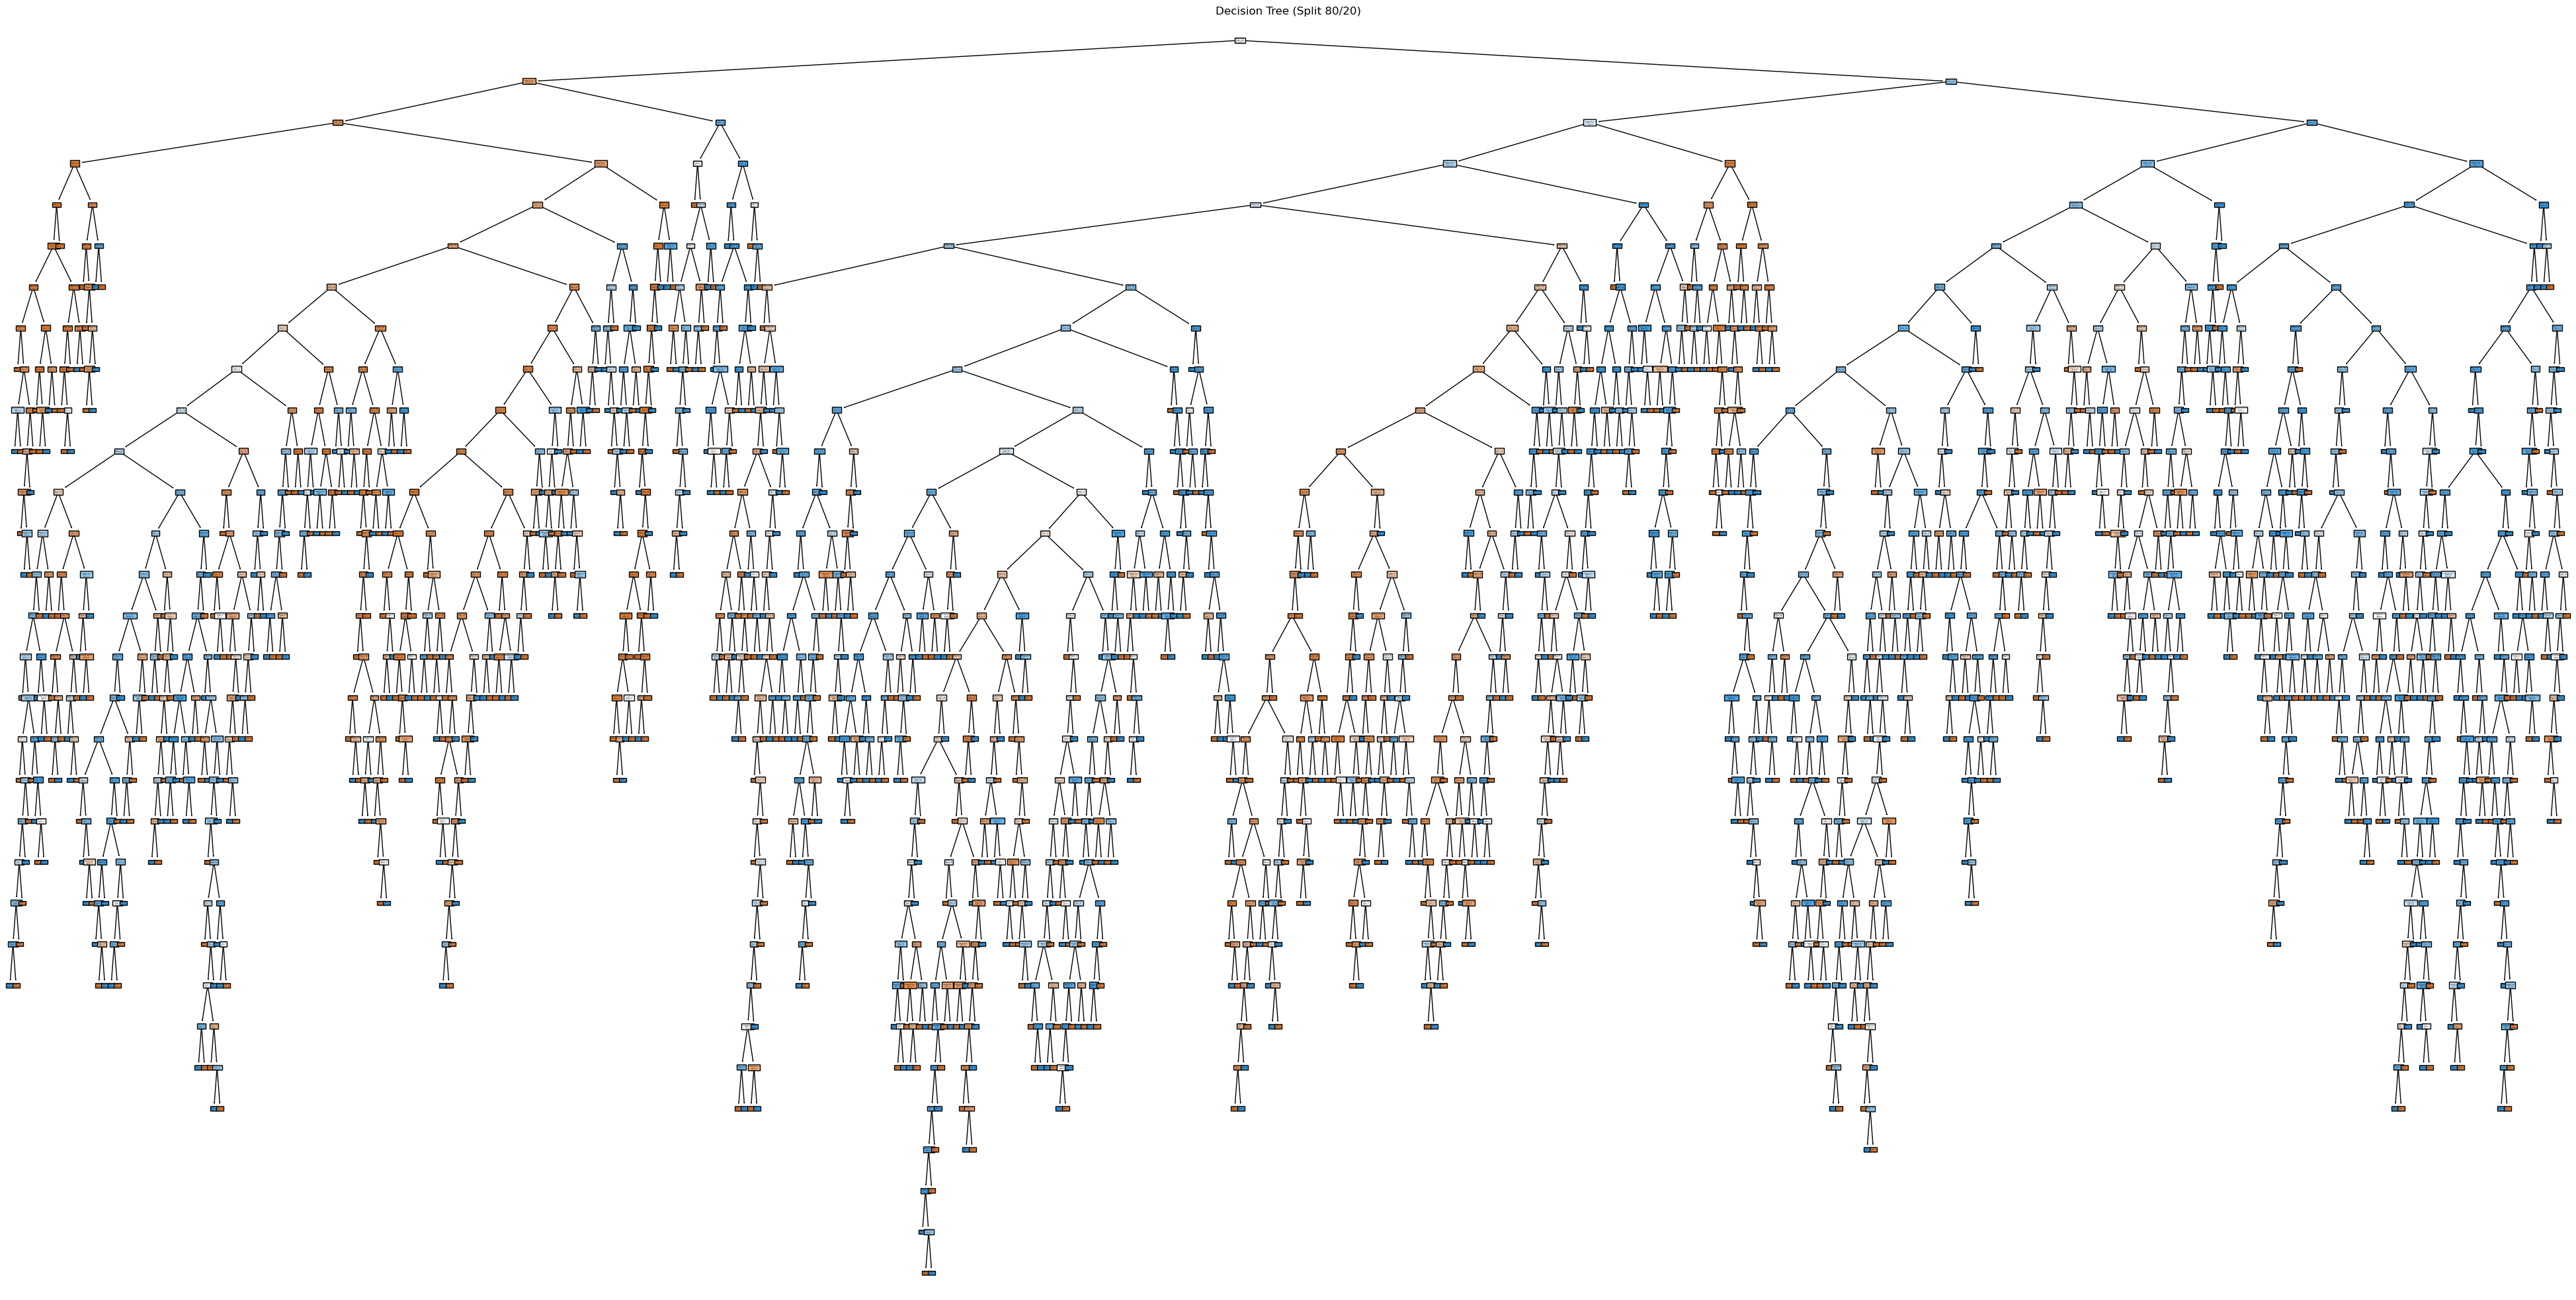

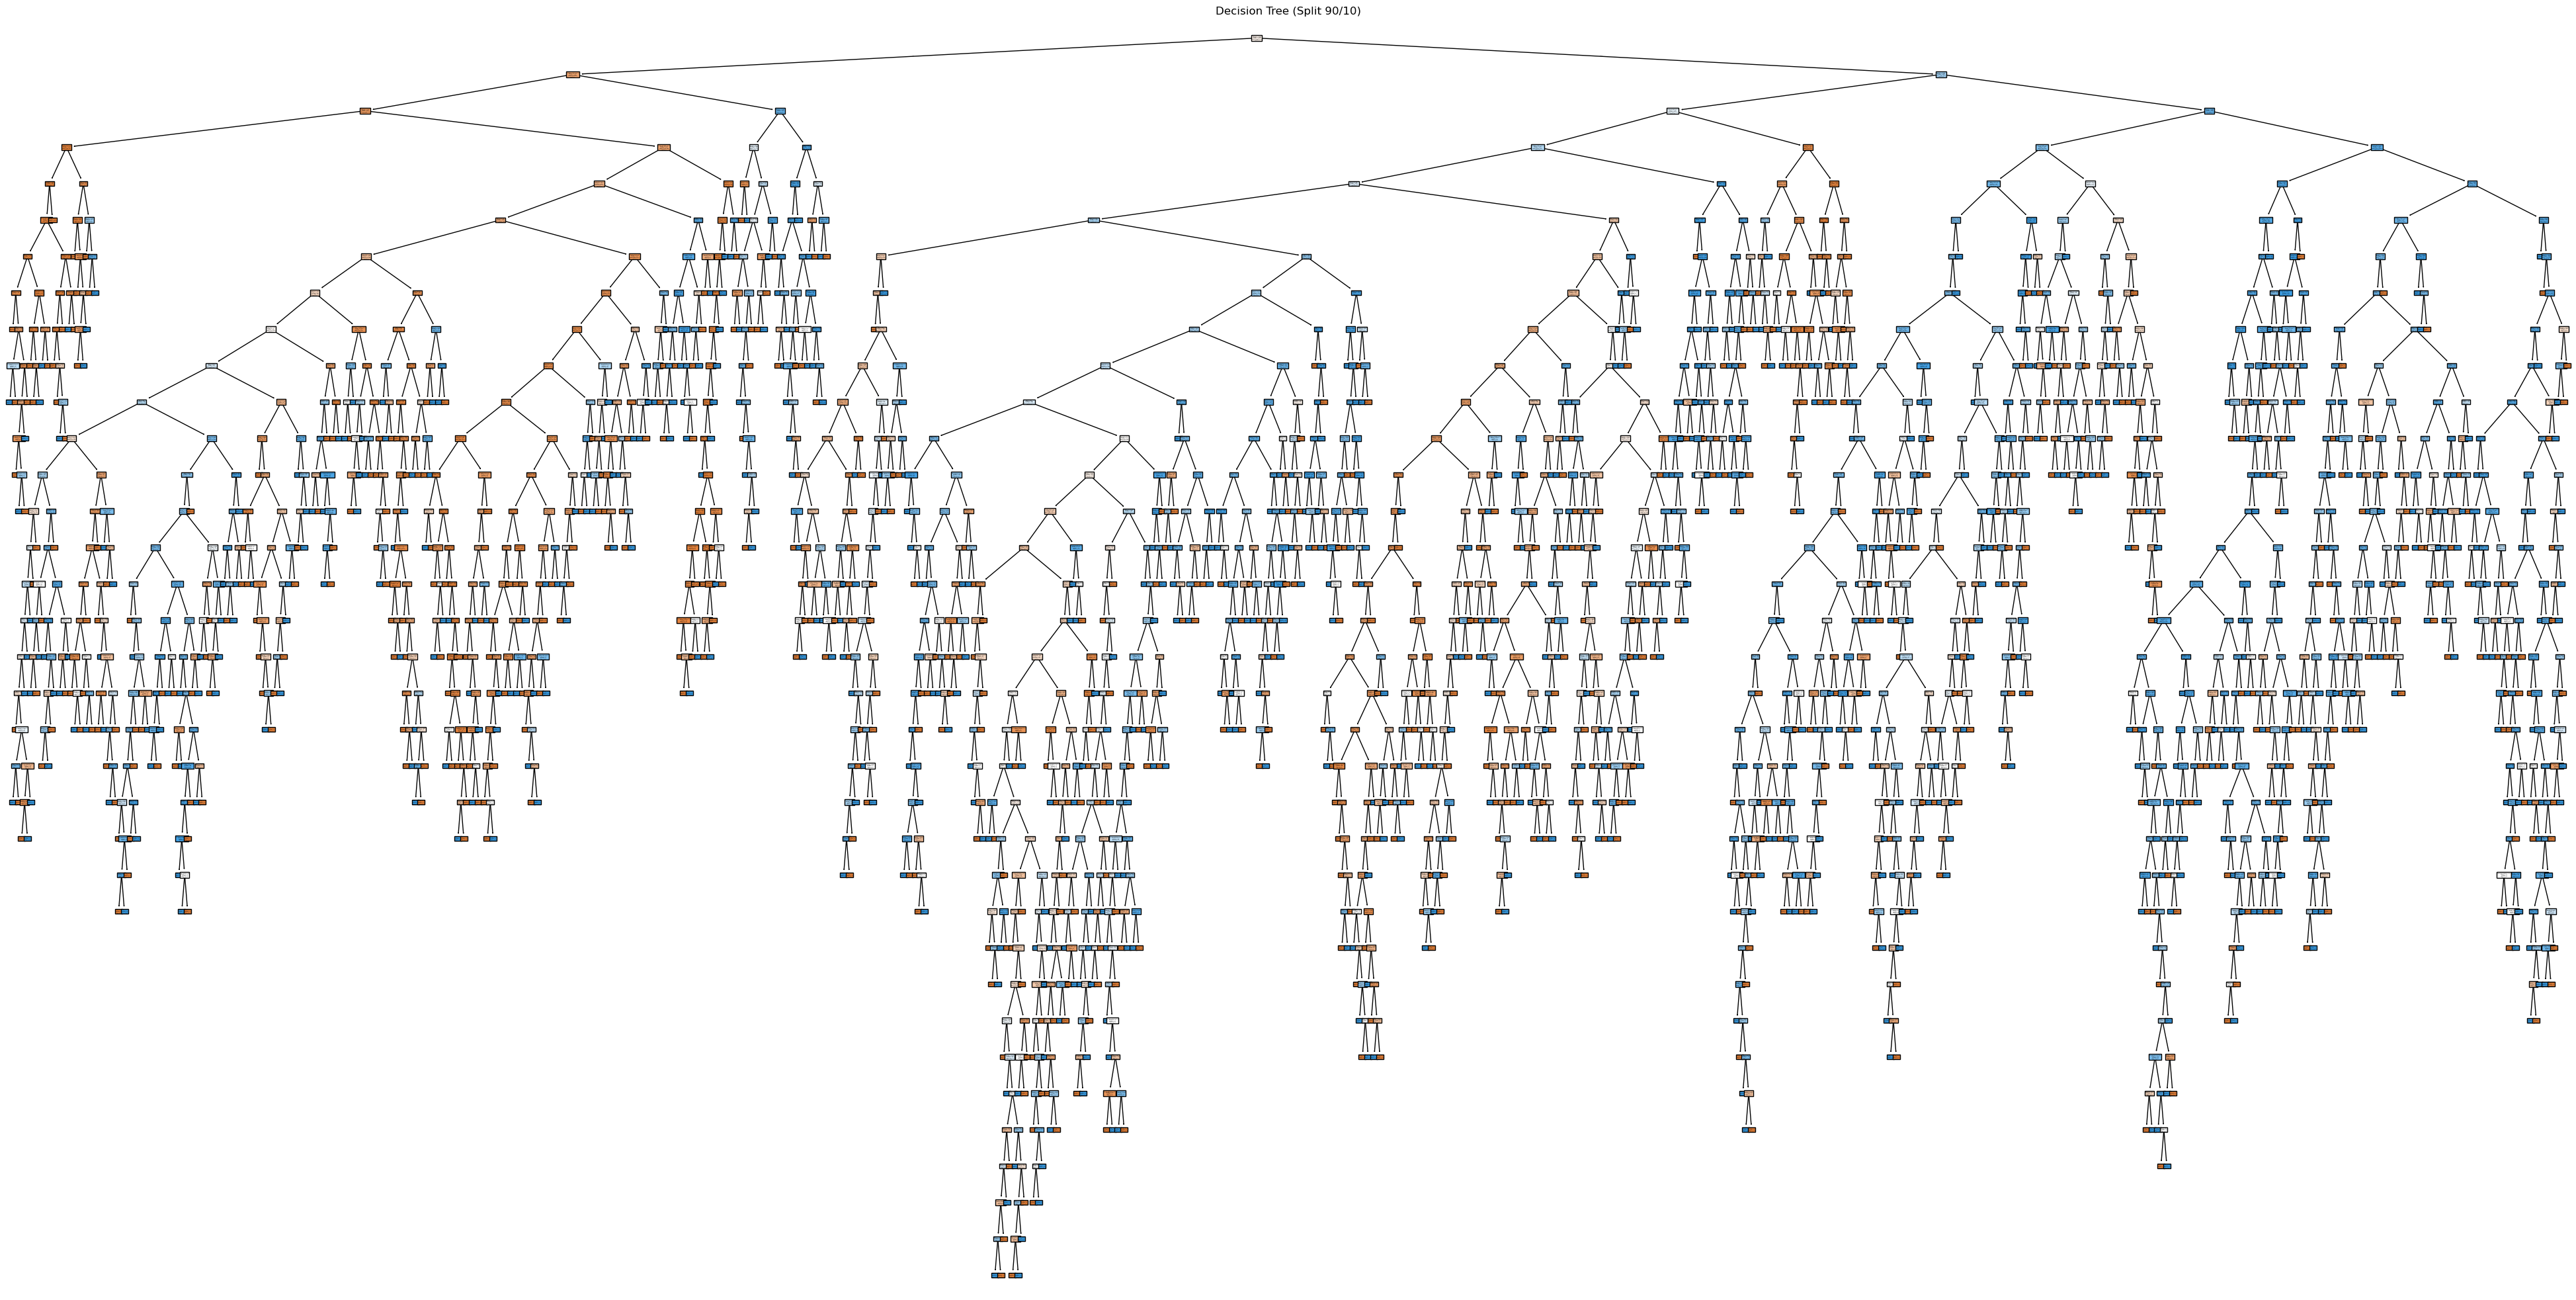

In [282]:
trees = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    trees.append((clf, X_train, X_test, y_train, y_test))

    # Plot tree (first none levels)
    plt.figure(figsize=(50,25))
    plot_tree(clf, feature_names=X.columns, class_names=['no','yes'], filled=True, max_depth=None)
    plt.title(f"Decision Tree (Split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 5. Evaluating the decision tree classifiers

### 📌 Evaluation Metrics Formulas:

- **Precision**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**:
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**:
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Accuracy**:
  $$
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
  $$


=== Evaluation for split 40/60 ===
              precision    recall  f1-score   support

          no       0.78      0.79      0.79      3524
         yes       0.77      0.76      0.76      3174

    accuracy                           0.78      6698
   macro avg       0.78      0.77      0.78      6698
weighted avg       0.78      0.78      0.78      6698



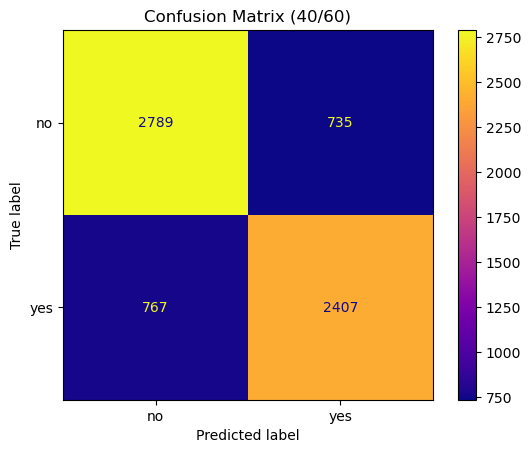

=== Evaluation for split 60/40 ===
              precision    recall  f1-score   support

          no       0.78      0.79      0.78      2349
         yes       0.76      0.75      0.76      2116

    accuracy                           0.77      4465
   macro avg       0.77      0.77      0.77      4465
weighted avg       0.77      0.77      0.77      4465



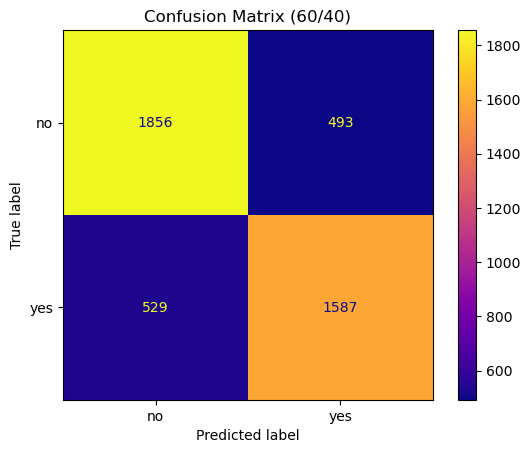

=== Evaluation for split 80/20 ===
              precision    recall  f1-score   support

          no       0.80      0.81      0.81      1175
         yes       0.79      0.78      0.79      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



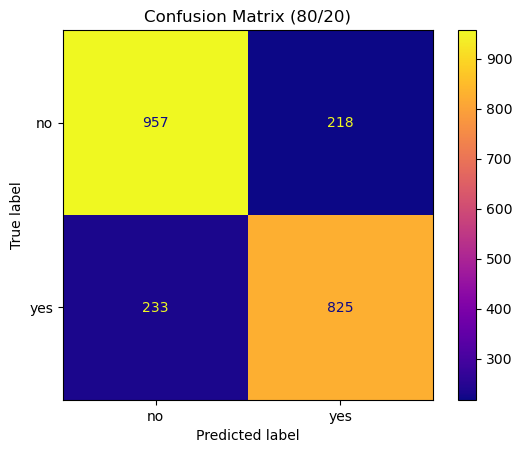

=== Evaluation for split 90/10 ===
              precision    recall  f1-score   support

          no       0.79      0.80      0.80       588
         yes       0.78      0.76      0.77       529

    accuracy                           0.79      1117
   macro avg       0.78      0.78      0.78      1117
weighted avg       0.79      0.79      0.79      1117



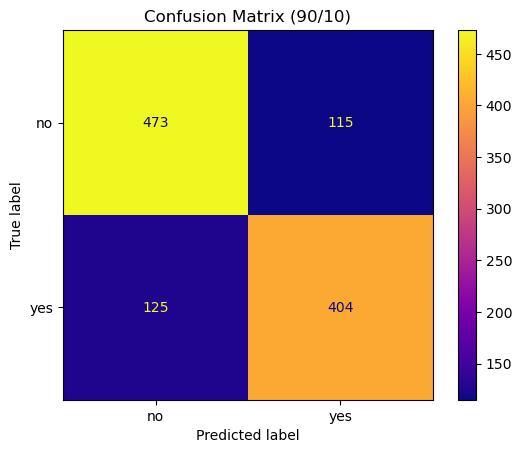

In [283]:
for idx, (clf, X_train, X_test, y_train, y_test) in enumerate(trees):
    y_pred = clf.predict(X_test)
    print(f"=== Evaluation for split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)} ===")
    print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['no', 'yes'])
    disp.plot(cmap='plasma')
    plt.title(f"Confusion Matrix ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 6. The depth and accuracy of a decision tree

In [284]:
X_train, X_test, y_train, y_test = subsets[2]  # 80/20 split

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

## Train decision trees on the 80/20 split dataset with varying depths.

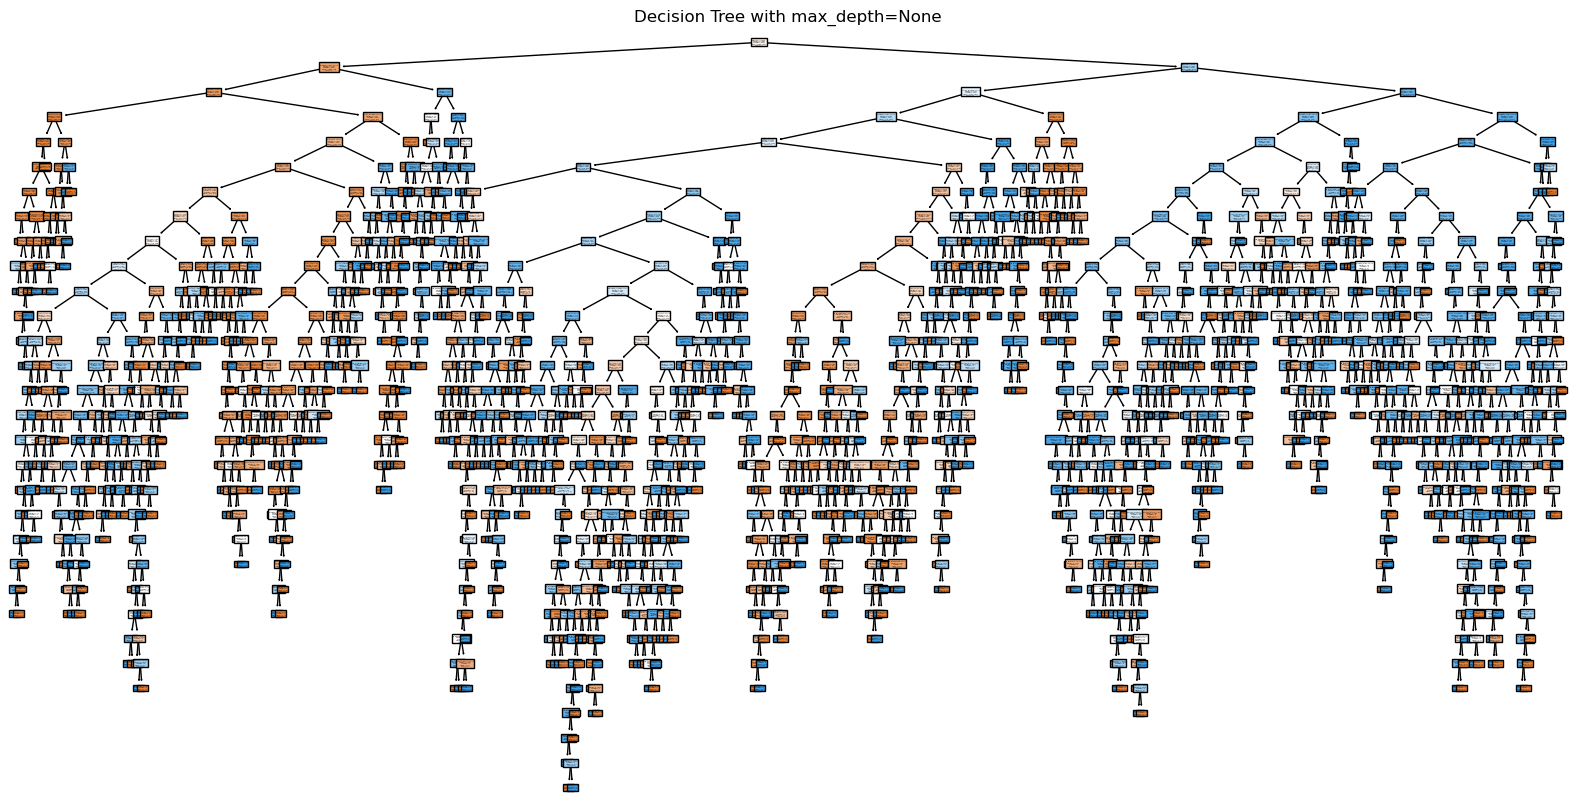

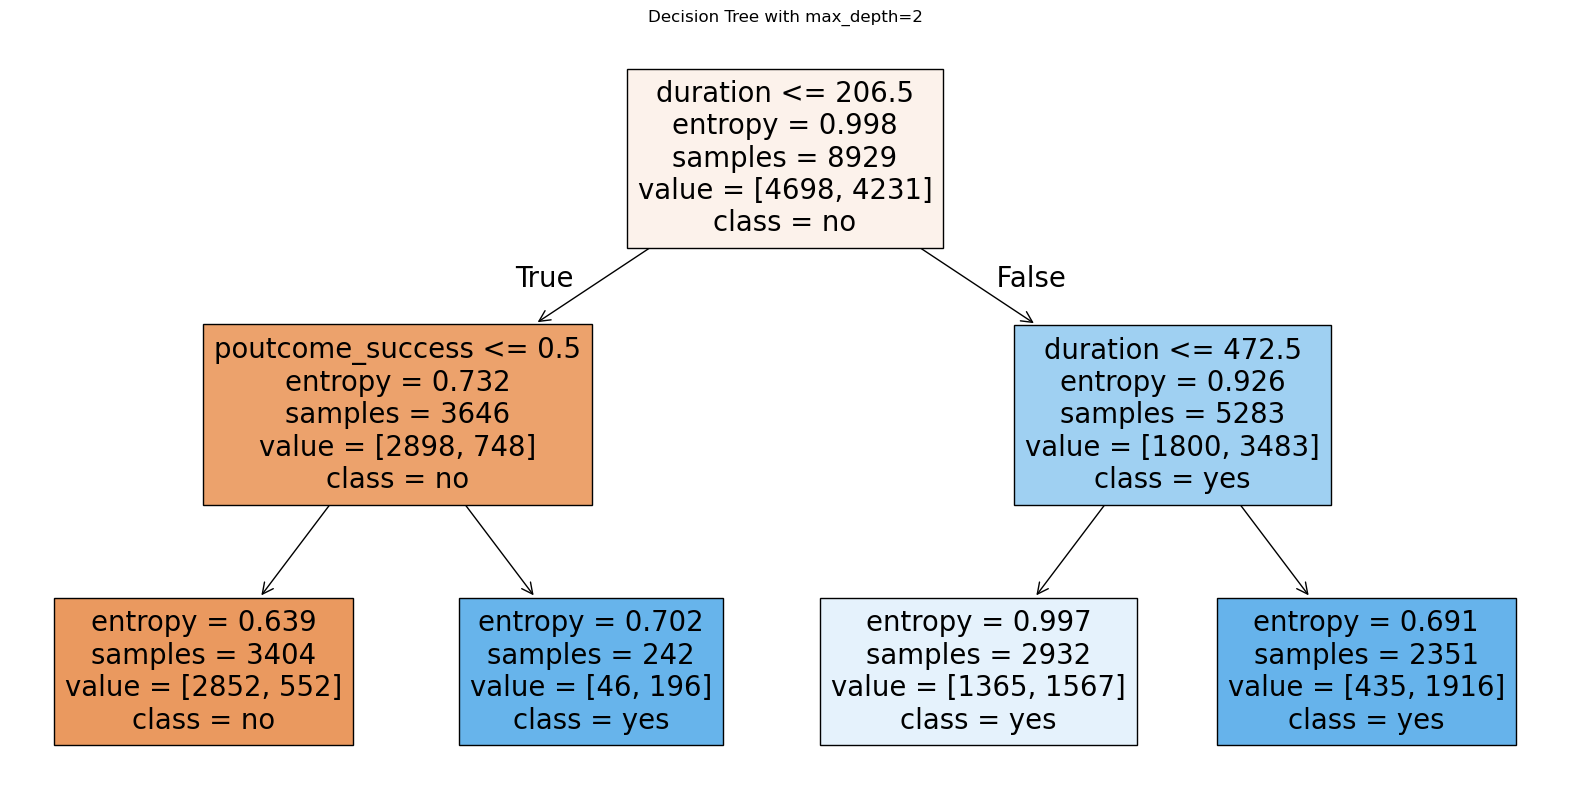

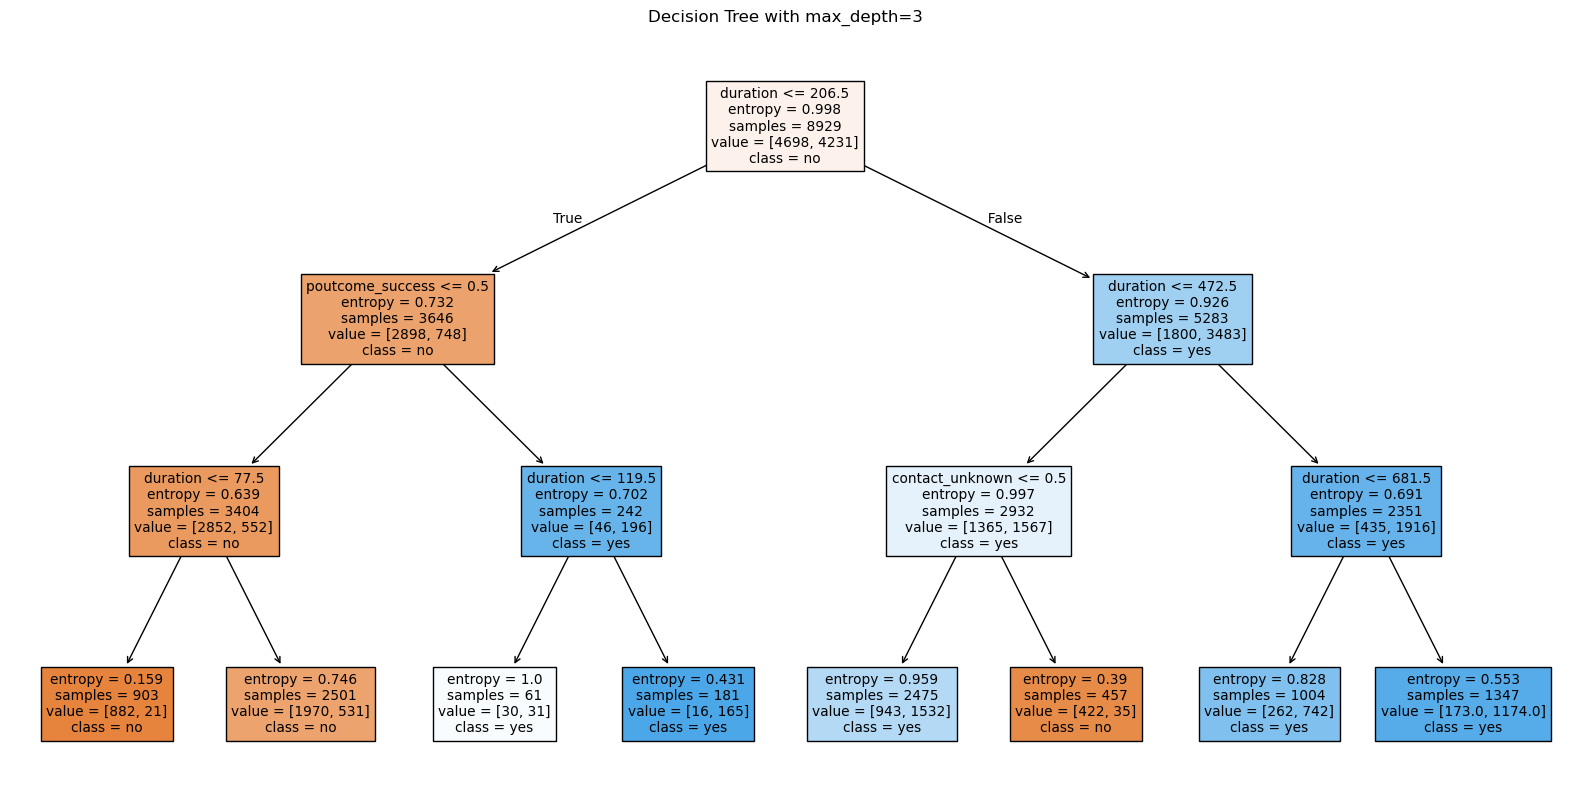

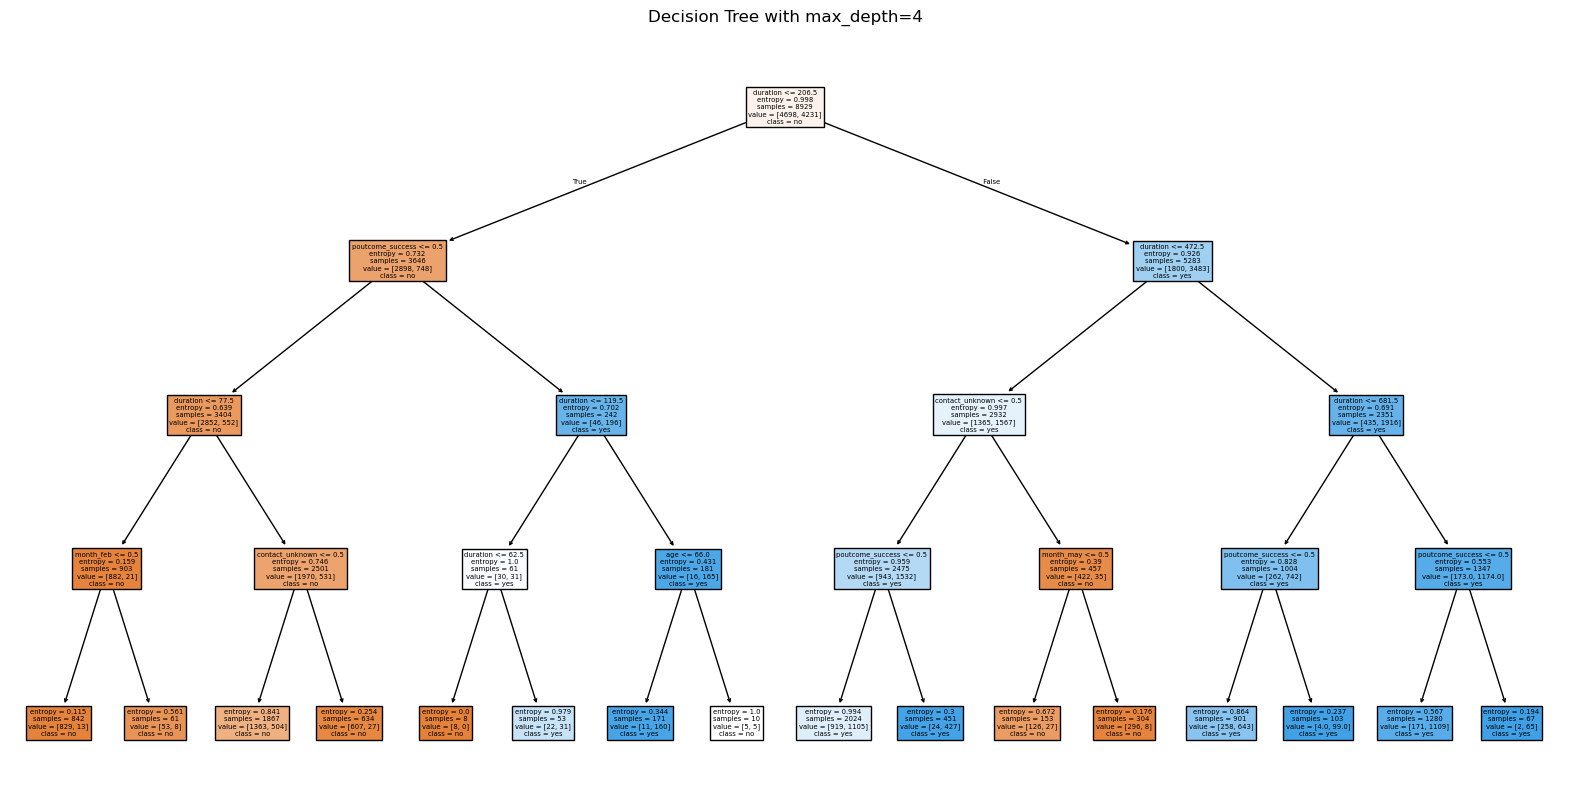

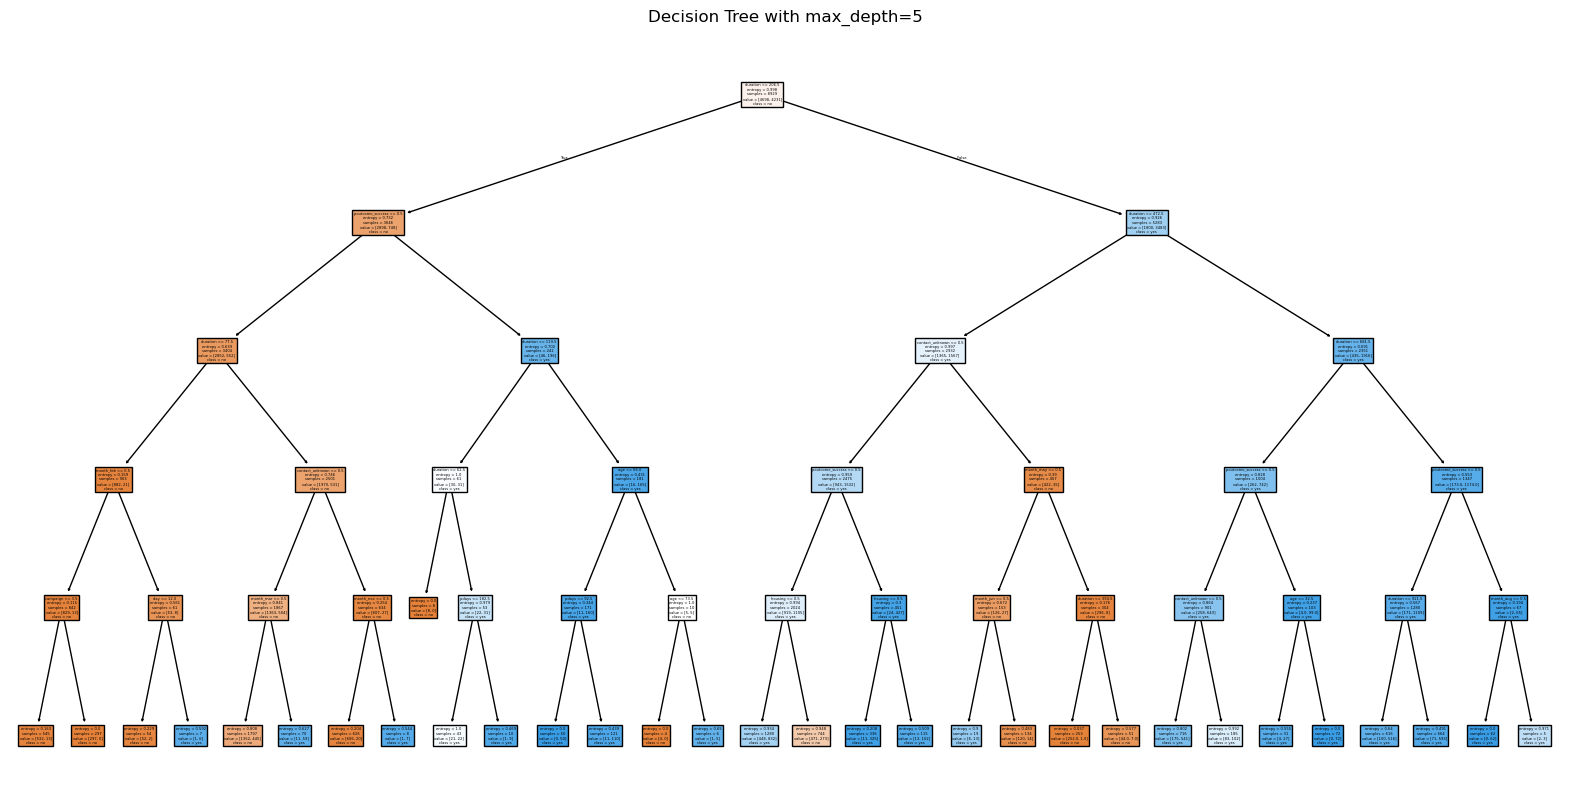

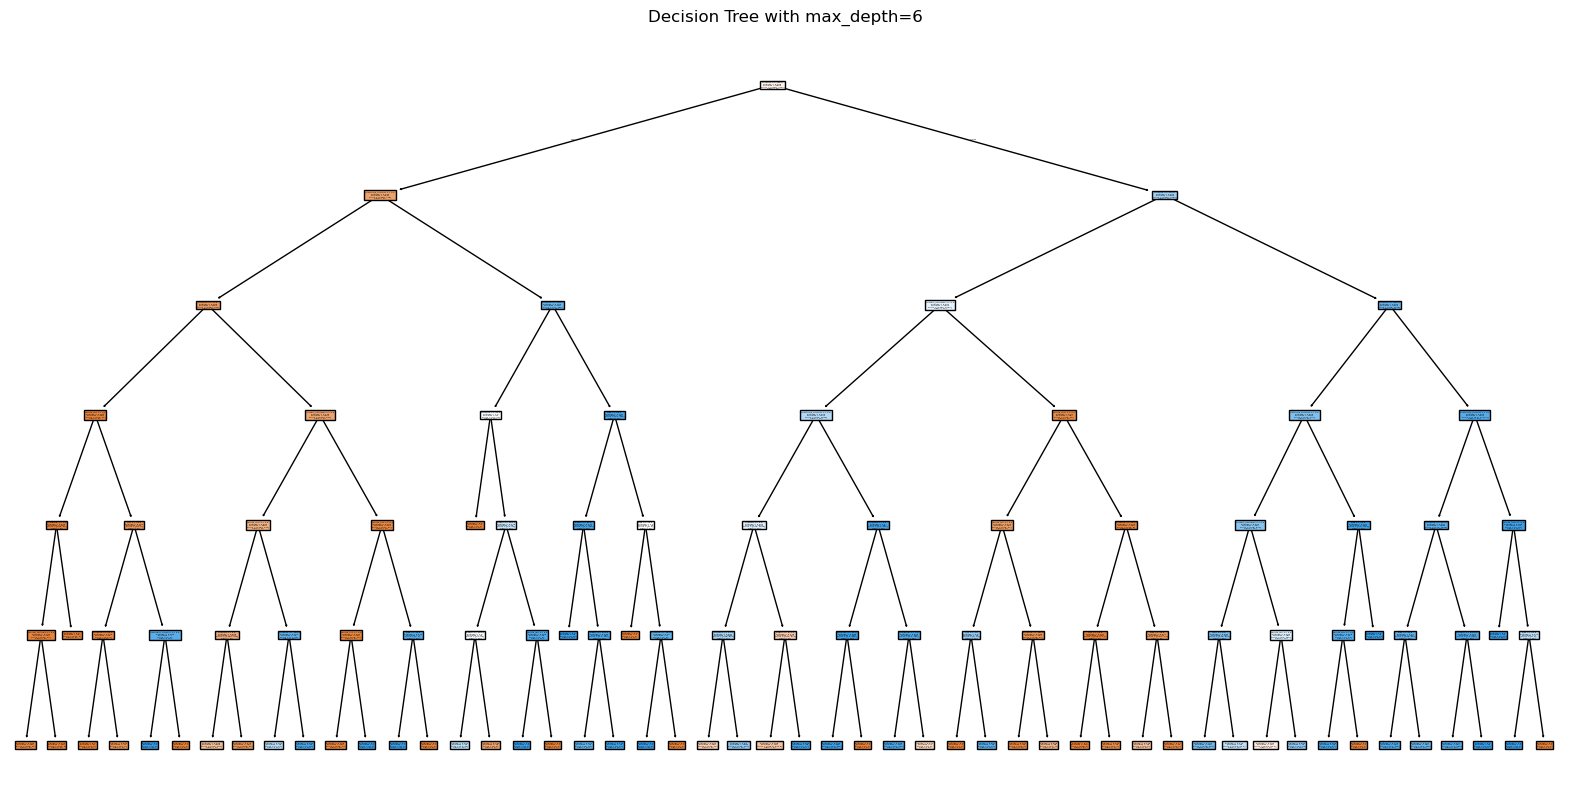

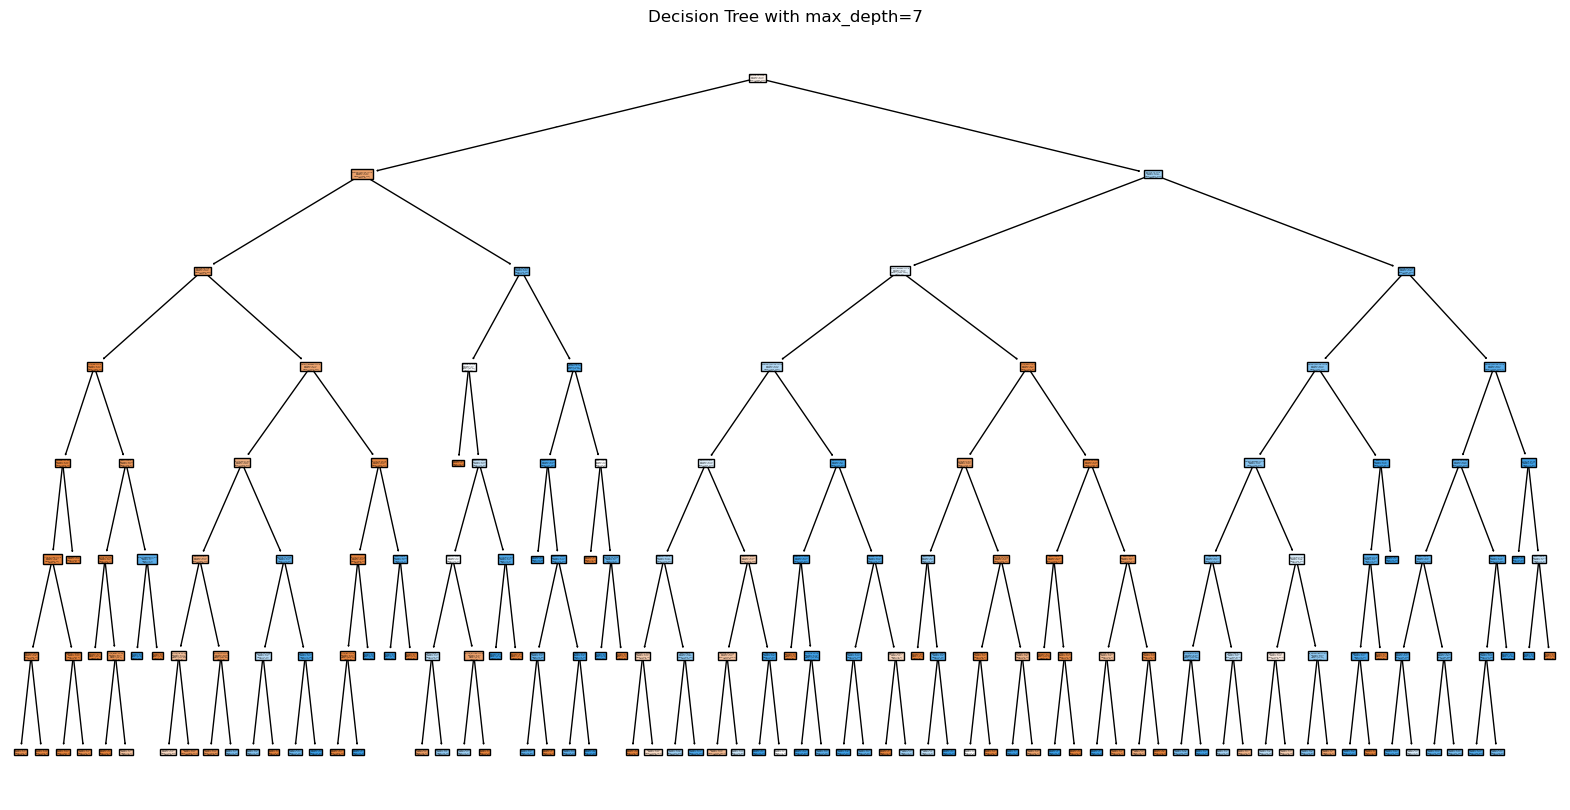

In [285]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names = ['no','yes'], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

## Plot accuracy vs max_depth

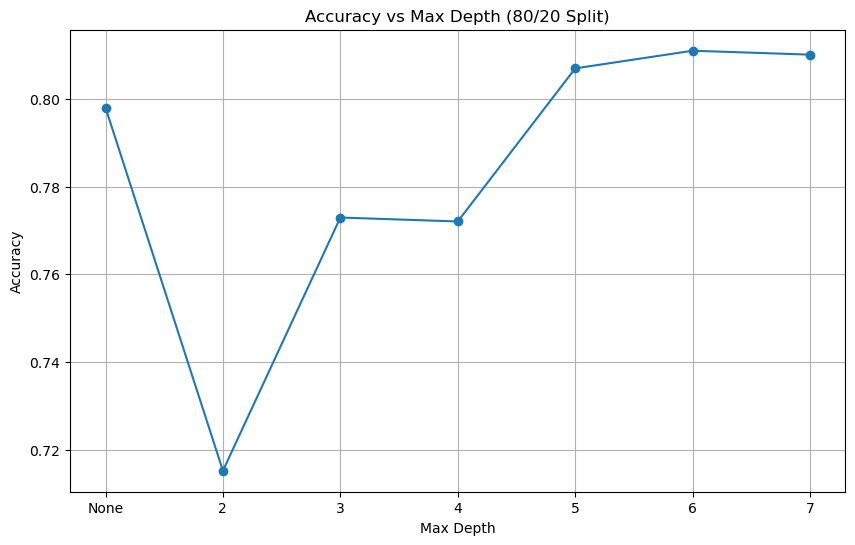

In [286]:
plt.figure(figsize=(10,6))
plt.plot(['None', 2, 3, 4, 5, 6, 7], accuracies, marker='o')
plt.title("Accuracy vs Max Depth (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Print accuracy table

In [287]:
print("\nAccuracy by max_depth:")
for d, acc in zip(['None',2,3,4,5,6,7], accuracies):
    print(f"Depth {d}: {acc:.4f}")


Accuracy by max_depth:
Depth None: 0.7980
Depth 2: 0.7152
Depth 3: 0.7730
Depth 4: 0.7721
Depth 5: 0.8070
Depth 6: 0.8110
Depth 7: 0.8101
